Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [21]:
data = pd.read_csv('ifood_df.csv')

# Data Cleaning and Feature Engineering

Verify no missing values

In [22]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegular

Feature engineering: Total amount spent

In [23]:
data['MntTotal'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Feature engineering: Response to campaigns

In [5]:
data['AcceptedCmpOverall'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Feature Selection for Clustering

Calculate Frequency

In [24]:
data['Frequency'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

Selecting features for clustering

In [25]:
features = data[['Recency', 'Frequency', 'MntTotal']]

Standardize the features

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-means Clustering

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Determine the optimal number of clusters using the Elbow method

In [28]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Plot the Elbow curve

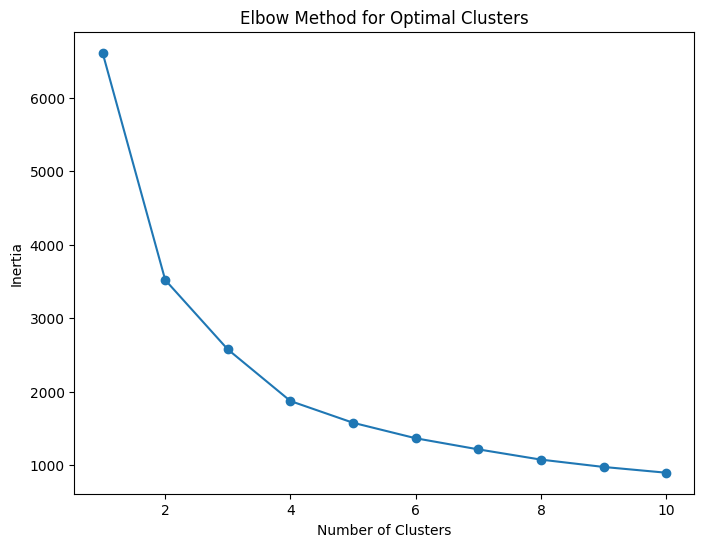

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Applying K-means clustering with the optimal number of clusters

In [30]:
optimal_clusters = 4  #Choose optimal number of clusters based on the Elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualization

In [15]:
import seaborn as sns

Scatter plot of Recency and Monetary Value colored by Cluster

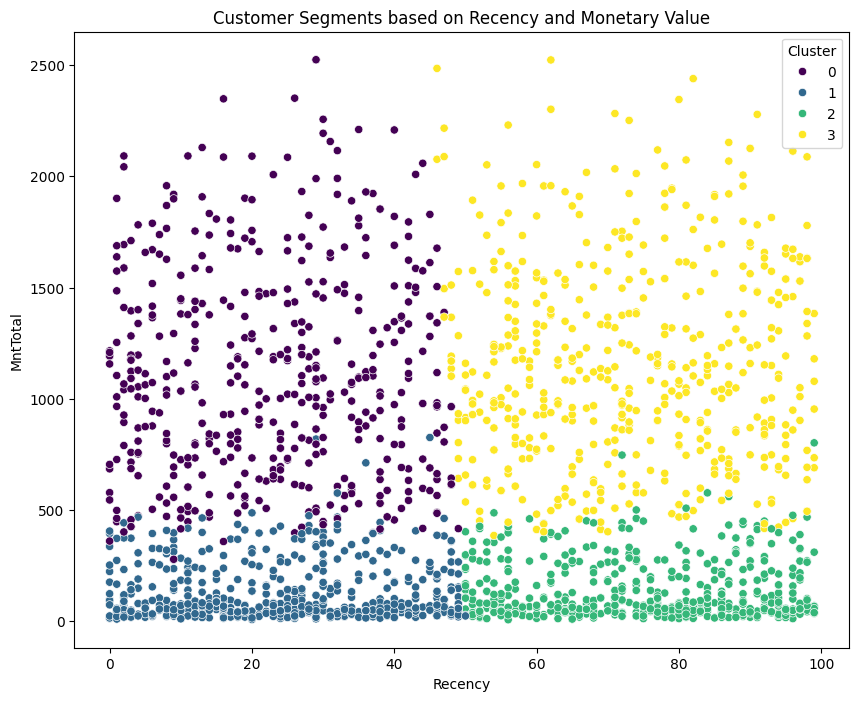

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Recency', y='MntTotal', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Recency and Monetary Value')
plt.show()

Bar plot of average RFM values per cluster

In [32]:
rfm_clustered = data.groupby('Cluster')[['Recency', 'Frequency', 'MntTotal']].mean().reset_index()
rfm_clustered_melted = pd.melt(rfm_clustered, id_vars=['Cluster'], value_vars=['Recency', 'Frequency', 'MntTotal'])

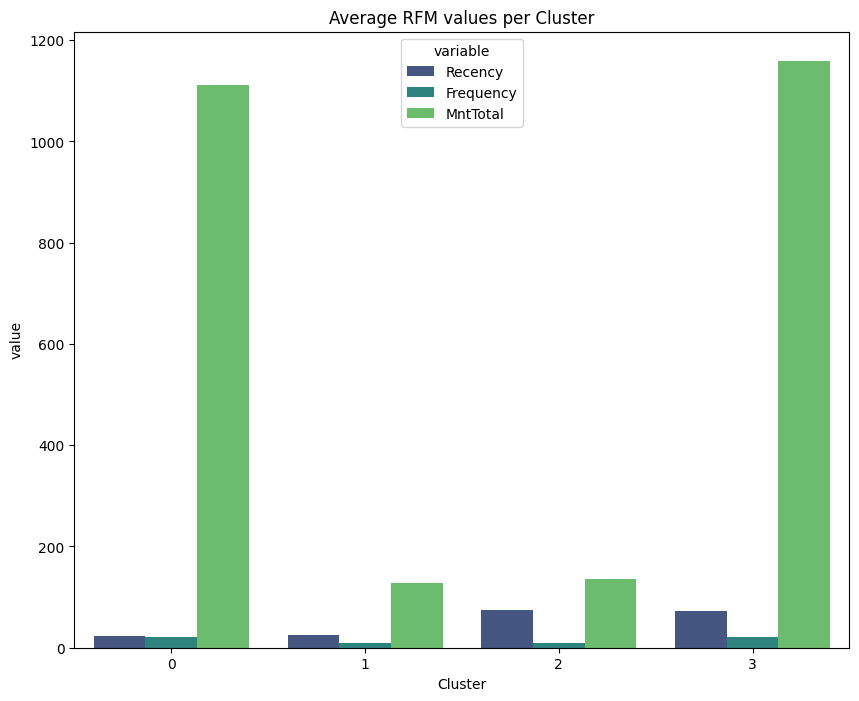

In [33]:
plt.figure(figsize=(10, 8))
sns.barplot(data=rfm_clustered_melted, x='Cluster', y='value', hue='variable', palette='viridis')
plt.title('Average RFM values per Cluster')
plt.show()

# Insights and Recommendations

Analyze the characteristics of each segment

In [34]:
segment_summary = data.groupby('Cluster').mean()
print(segment_summary)


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        68191.174797  0.146341  0.506098  22.617886  564.030488  49.504065   
1        36190.597643  0.707071  0.486532  24.518519   59.026936   6.247475   
2        36938.723592  0.727113  0.522887  74.737676   62.454225   6.934859   
3        68599.366606  0.127042  0.511797  72.453721  593.564428  47.573503   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             311.020325        67.959350         48.262195     70.069106   
1              27.932660         9.599327          5.712121     18.769360   
2              31.748239         9.466549          6.772887     18.869718   
3             320.990926        70.304900         52.328494     74.056261   

         ...  marital_Widow  education_2n Cycle  education_Bas

Provide insights and recommendations for each segment

In [35]:
for cluster in range(optimal_clusters):
    segment = data[data['Cluster'] == cluster]
    print(f"Segment {cluster} Characteristics:")
    print(segment.describe())
    print(f"Recommendations for Segment {cluster}:")
    if segment['Recency'].mean() < 30:
        print("Target this segment with frequent promotions to maintain engagement.")
    elif segment['MntTotal'].mean() > 1000:
        print("Focus on premium product offerings and loyalty programs for this segment.")
    print("\n")

Segment 0 Characteristics:
              Income     Kidhome    Teenhome     Recency     MntWines  \
count     492.000000  492.000000  492.000000  492.000000   492.000000   
mean    68191.174797    0.146341    0.506098   22.617886   564.030488   
std     13759.674361    0.359518    0.543395   14.016586   304.633032   
min      2447.000000    0.000000    0.000000    0.000000     1.000000   
25%     60081.000000    0.000000    0.000000   10.000000   328.500000   
50%     69102.500000    0.000000    0.000000   23.000000   508.500000   
75%     77849.500000    0.000000    1.000000   34.000000   762.000000   
max    113734.000000    2.000000    2.000000   49.000000  1478.000000   

        MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  492.000000       492.000000       492.000000        492.000000   
mean    49.504065       311.020325        67.959350         48.262195   
std     50.451747       236.619651        64.107998         48.652916   
min      0.000000      